#DA24C026 - Assignment 3

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#comment below if not using ipython notebook
%matplotlib inline

In [190]:
df = pd.read_csv('Assignment3.csv')
for col in df.columns:
    df[col] = df[col].astype(float)
df.head()

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98


##Task 1 - OLS fit

In [191]:
xx = df.iloc[:, :-1].values
yy = np.expand_dims(df['y'], 1)

In [192]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [193]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : [-9655.31030896]
Loss : 71877.84134016866


OLS SSE - 71,877.84

##Task - 2 EDA

In [194]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


###Visualising distribution of different features

In [195]:
import seaborn as sb

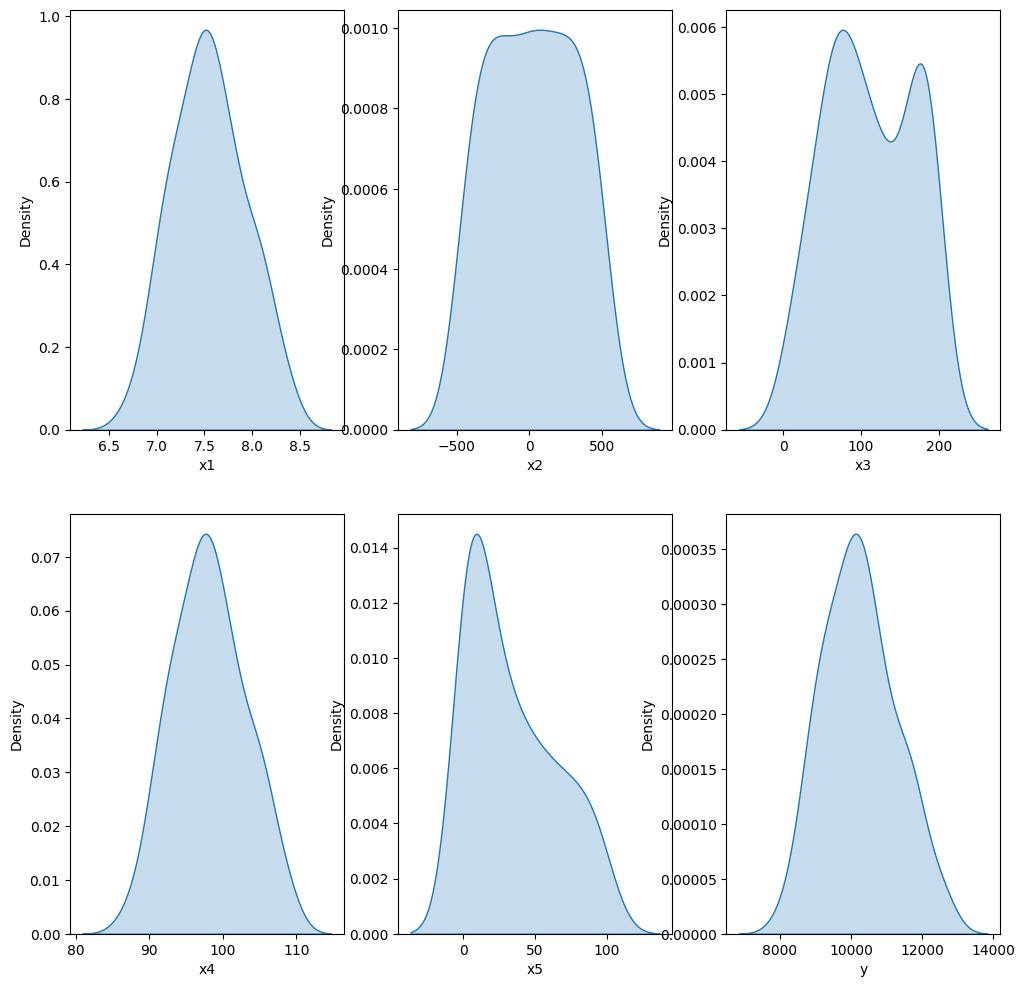

In [196]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,12))

sb.kdeplot(df['x1'], label='x1', ax = axes[0,0], fill =1)
sb.kdeplot(df['x2'], label='x2', ax = axes[0,1], fill =1)
sb.kdeplot(df['x3'], label='x3', ax = axes[0,2], fill =1)
sb.kdeplot(df['x4'], label='x4', ax = axes[1,0], fill =1)
sb.kdeplot(df['x5'], label='x5', ax = axes[1,1], fill =1)
sb.kdeplot(df['y'], label='y', ax = axes[1,2], fill =1)

plt.show()

###*Interpretation of the KDE plots*

Kernel Density Estimation (KDE) plot is used for visualizing the probability density of a continuous variable. It depicts the probability density at different values for a continuous variable. It visually represents the distribution of data, providing insights into its shape, central tendency and spread.

Observations

Attributes:
- x1: The distribution is roughly normal, with a peak around 7.5.
- x2: The distribution is centered around 0, with a slight left skew
- x3: The distribution is multimodal, with peaks around 50 and 175
- x4: The distribution is approximately normal, with a peak around 95 with a slight right skew
- x5: The distribution is skewed to the right, with a peak around 5.

Target Variable (y):
The distribution is roughly normal with a peak around 10000

Correlation Matrix

In [197]:
corr = np.corrcoef(xx.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


In [198]:
print(corr > 0.9)

[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


In [199]:
all_data = np.concatenate((xx, yy), axis=1)
corr_all = np.corrcoef(all_data.T)
print(corr_all)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


In [200]:
print(corr_all > 0.7)

[[ True  True False  True False  True]
 [ True  True False  True False  True]
 [False False  True False False False]
 [ True  True False  True False  True]
 [False False False False  True False]
 [ True  True False  True False  True]]


##Visualization of Correlations amongst features

###I) Pair plot

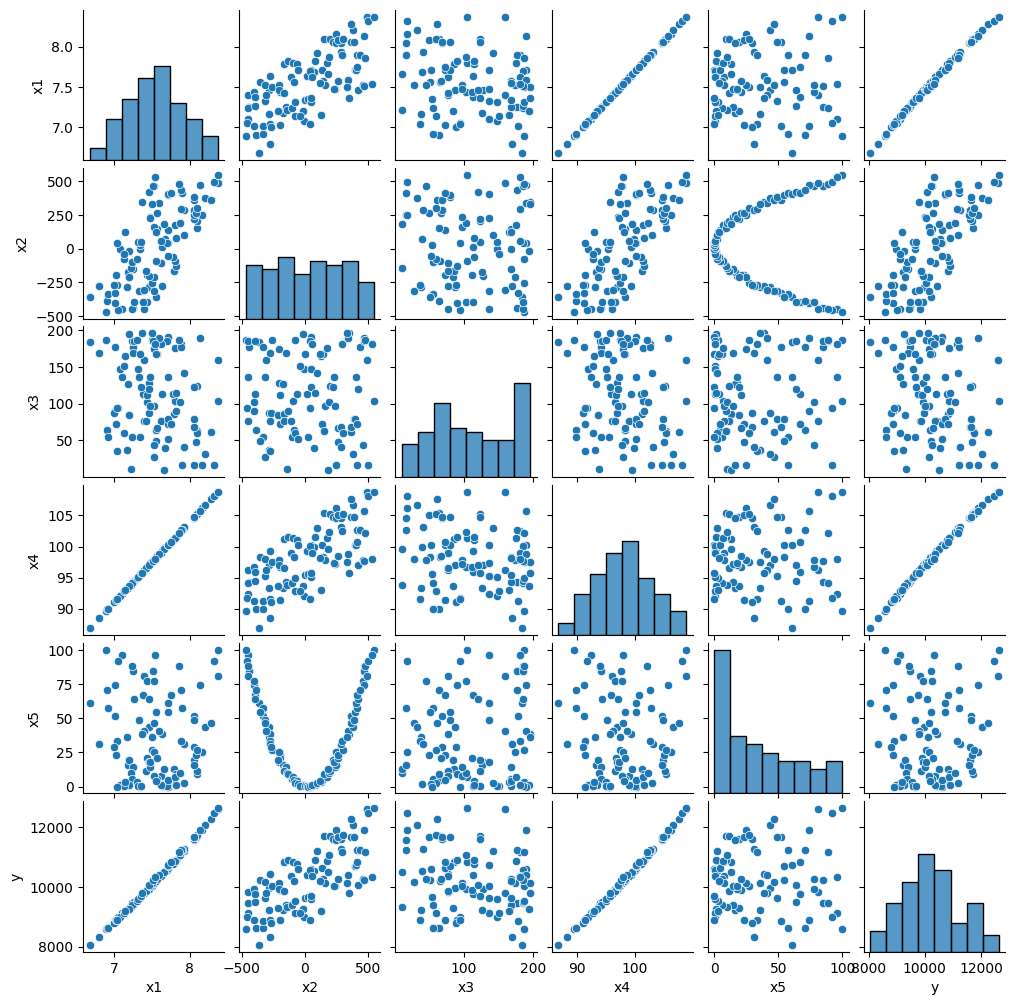

In [201]:
import seaborn as sb

plot =sb.pairplot(df)
plot.fig.set_size_inches(10,10)

###II) Heat Map

Text(0.5, 1.0, 'Correlation Matrix')

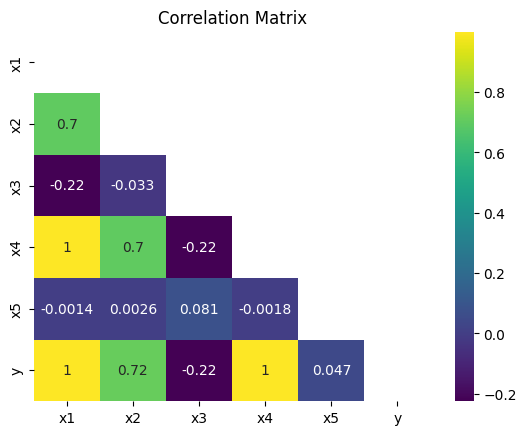

In [202]:
mask = np.triu(np.ones_like(corr_all, dtype=bool))
sb.heatmap(corr_all, annot=True, cmap='viridis', mask = mask, xticklabels=['x1','x2','x3','x4','x5','y'], yticklabels=['x1','x2','x3','x4','x5','y'])
plt.title('Correlation Matrix')

###III) Bar Plot ( Correlation of Target variable with all predictors)

In [203]:
corr_y = corr_all[-1, :-1]

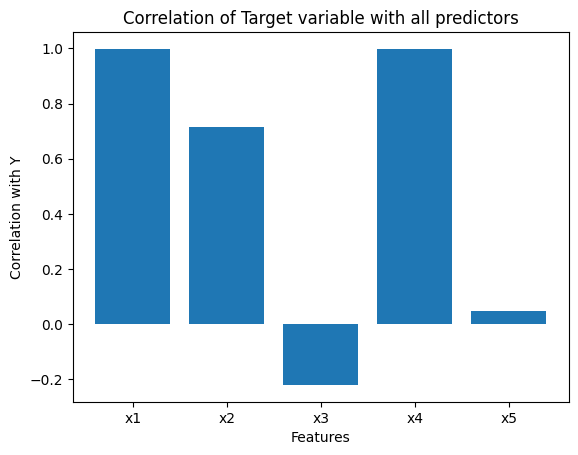

In [204]:
plt.bar(['x1','x2','x3','x4','x5'],corr_y)
plt.ylabel('Correlation with Y')
plt.xlabel('Features')
plt.title('Correlation of Target variable with all predictors')
plt.show()

## Inferences from above plots


- x1 and y: Strong positive linear relationship.
- x4 and y: Strong positive linear relationship.
- x1 and x4: Strong positive linear relationship between the predictors themselves.
- x2 and y: Moderate positive linear relationship.
- x3 and y: Weak negative linear relation.
- x2 and x5: Strong non - linear (Quadratic) relationship.    
    
For Most combinations involving x2, x3, x5: Weak or no relationships are seen.

EDA Conclusions
- x1 and x4: These predictors are highly correlated with the target variable (y) and with each other.
- x2: While it has a moderate positive correlation with y, its relationship is less straightforward.
- x3: The relationship between x3 and y is weak and negative.
- x5: There is nearly no relation between x5 and y but x5 is non linearly related with x2.


## TASK 3 - Feature transformations for Error reduction

First, we will try and model non linear relationship between x2 and x5 using quadratic features.

In [205]:
x2_sq = np.square(df['x2'])
x5_sq = np.square(df['x5'])
x2x5 = df['x2']*df['x5']

In [206]:
data = pd.DataFrame({'x1':df['x1'],'x2':df['x2'],'x3':df['x3'],'x4':df['x4'],'x5':df['x5'],'x2_sq':x2_sq, 'x5_sq':x5_sq, 'x2x5':x2x5, 'y':df['y']})
data.head()

,x1,x2,x3,x4,x5,x2_sq,x5_sq,x2x5,y
0,7.11,-447.71,135.66,92.41,96.04,200444.24,9223.68,-42998.07,9131.40
1,7.06,-455.33,94.49,91.76,92.16,207325.41,8493.47,-41963.21,9001.86
2,6.89,-466.86,186.25,89.54,100.00,217958.26,10000.00,-46686.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,194066.68,7163.93,-37286.46,9469.94
4,7.24,-445.92,185.90,94.11,88.36,198844.65,7807.49,-39401.49,9448.98


In [207]:
xx = data.iloc[:, :-1].values
yy = np.expand_dims(data['y'], 1)

In [208]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[-1.16932899e+03  8.25612242e-02 -6.66595497e-02  2.92109959e+02
   3.44036437e-01  4.61583270e-04  1.58528031e-03 -5.88026463e-05]]  Bias : [-9643.39861833]
Loss : 70296.46033478317


We can observe that after adding Quadratic features of x1 and x5 the OLS error dropped by some amount.

Next we will Drop X1 as X1 and X4 are highly correlated and redundant features.


In [209]:
data.drop(columns=['x1'], inplace=True)

In [210]:
xx = data.iloc[:, :-1].values
yy = np.expand_dims(data['y'], 1)

In [211]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[ 8.37986182e-02 -7.64189147e-02  2.02016949e+02  4.00675406e-01
   4.52415752e-04  1.14781285e-03 -1.95138484e-05]]  Bias : [-9628.36843664]
Loss : 71060.76569841568


SSE didn't got any worse or better.
- Thus, we understood that X1 was not adding any new valuable information to the model.


Now we will try to model more non linear relationships in our data to further reduce the SSE.

In [212]:
x3_sq = np.square(data['x3'])
x4_sq = np.square(data['x4'])
x3x4 = data['x3']*data['x4']
x2x3 = data['x2']*data['x3']
x2x4 = data['x2']*data['x4']
x3x5 = data['x3']*data['x5']
x4x5 = data['x4']*data['x5']

Let's create a data frame with all quadratic relations and try to fit our model

In [213]:
data2 = pd.DataFrame({'x2_sq':x2_sq, 'x3_sq':x3_sq, 'x4_sq':x4_sq, 'x5_sq':x5_sq, 'x2x3':x2x3, 'x2x4':x2x4, 'x2x5':x2x5,'x3x4':x3x4, 'x3x5':x3x5, 'x4x5':x4x5, 'y':data['y']})

In [214]:
data2.head()

,x2_sq,x3_sq,x4_sq,x5_sq,x2x3,x2x4,x2x5,x3x4,x3x5,x4x5,y
0,200444.24,18403.64,8539.61,9223.68,-60736.34,-41372.88,-42998.07,12536.34,13028.79,8875.06,9131.40
1,207325.41,8928.36,8419.90,8493.47,-43024.13,-41781.08,-41963.21,8670.40,8708.20,8456.60,9001.86
2,217958.26,34689.06,8017.41,10000.00,-86952.68,-41802.64,-46686.00,16676.83,18625.00,8954.00,8595.85
3,194066.68,31268.85,8881.18,7163.93,-77898.92,-41515.55,-37286.46,16664.46,14966.89,7976.47,9469.94
4,198844.65,34558.81,8856.69,7807.49,-82896.53,-41965.53,-39401.49,17495.05,16426.12,8315.56,9448.98


In [215]:
xx = data2.iloc[:, :-1].values
yy = np.expand_dims(data2['y'], 1)

In [216]:
model = linear_model.LinearRegression()
model.fit(xx, yy)
yhat = model.predict(xx)
loss = SSE(yy, yhat)
print("Beta :", model.coef_, " Bias :", model.intercept_)
print("Loss :",loss)

Beta : [[ 8.49517727e-06  7.81124193e-06  1.02577392e+00 -9.23696658e-05
   3.54917110e-05  1.03070897e-03 -1.54129543e-04 -9.51730443e-05
   3.05363061e-04  1.23878397e-02]]  Bias : [295.67373655]
Loss : 561.8350892246342


####**FINAL SSE for the LINEAR MODEL with Degree 2 Features: 561.83**



####Conclusion Table

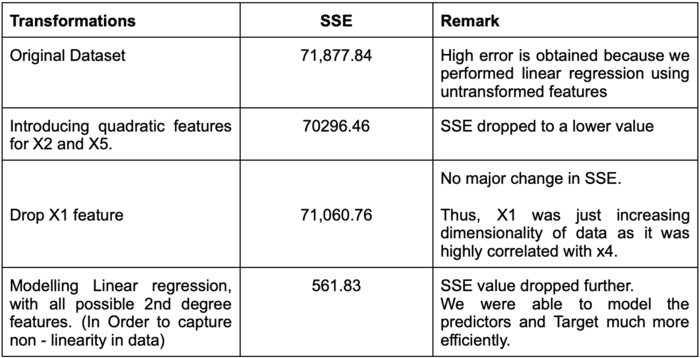

##TASK 4 - LazyRegressor

In [217]:
!pip install lazypredict

In [218]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [235]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.y, test_size=0.25, random_state=42)

In [239]:
clf = LazyRegressor()
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:04<00:00, 10.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 75, number of used features: 5
[LightGBM] [Info] Start training from score 10226.177760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

##Interpretations of the LazyRegressor results
This data is prone to overfitting due to relatively limited data points. With fewer data points, models can easily memorize the training data instead of generalizing well to unseen data.






- As we can observe from the results above, the regularization techniques (Lasso, LassoCV, RidgeCV, Ridge) and regularized Linear models perform really well.

  - A possible reason for good performance of these methods is that they help to prevent overfitting by penalizing large coefficients, which is particularly beneficial when dealing with limited data.
  
- As observed in the LazyRegressor model results, the performance of Tree based algorithms are not up to the mark. The reason being, Tree-based algorithms are often at risk to overfit, especially with limited data.

  - One of the plausible reasons is that they can create complex decision trees that fit the given limited training data too closely, leading to poor performance on new unseen test data.